# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [3]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

# !pip install wordcloud
# !pip install fileupload
# !pip install ipywidgets
# !jupyter nbextension install --py --user fileupload
# !jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [5]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `test.txt` (13.33 kB)


In [6]:
print(file_contents.lower())

at first we were equipped with the old springfield rifle, but this was
soon replaced by the krag-jorgensen carbine. each trooper was soon
fully equipped as follows: horse, mcclellen saddle, saddle bags,
bridle, halter, and horse blanket, carbine, saber, colt revolver,
belts, and ammunition, canteen, mess kits, sleeping blanket, shelter
half, and uniforms.

the ladies of harrisburg and hazleton were extremely generous to the
troop. from harrisburg each soldier received a large and beautiful
yellow silk neckerchief, a bible, and a large quantity of pipes and
tobacco. from hazleton came literature and boxes after boxes of
edibles, which were greatly relished by the troopers.

some time was consumed in the breaking of horses, getting them bridle
wise, and training them to the saddle, and this afforded great
amusement to the thousands of spectators who visited the reservation
daily. the troop, which consisted of one hundred privates and three
commissioned officers, was made up of men from v

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [7]:
from collections import Counter

In [8]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    file_contents = file_contents.lower()
    for punc in file_contents:
        if punc in punctuations:
            file_contents.replace(punc, "")
            
    file_contents = file_contents.replace(",", "")
    file_contents = file_contents.replace(":", "")
    file_contents = file_contents.replace(".", "")
    
    
    file_contents = file_contents.replace("\n", " ")
#     file_contents = "".join(l for l in file_contents if l not in string.punctuation)
    
    file_words = file_contents.split(" ")
    file_words = [wrd.strip() for wrd in file_words]
    file_words = [d.replace('“', '').replace('”', '') for d in file_words]
    file_words = [d.replace('(', '').replace(')', '') for d in file_words]
    file_words = [d.replace('――', ' ').replace('_', '') for d in file_words]
    
    file_words = [item for item in file_words if item.isalpha()]
#     print(len(file_words))
    
    file_words = [wrd for wrd in file_words if wrd not in uninteresting_words]
#     unique_words = list(set(file_words))
#     print(len(file_words))
    word_freq = Counter(file_words)
#     print(len(word_freq))
#     print(word_freq.keys())
    
#     for word in unique_words:
#         if word not in uninteresting_words:
#             word_count = file_words.

    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(word_freq)
#     cloud.to_file("myfile.jpg")
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

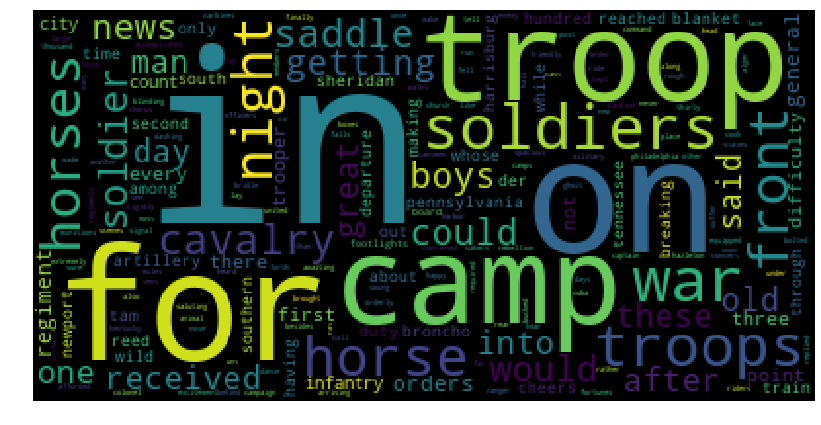

In [9]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.figure(figsize = (14, 12))
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!